In [1]:
using PyCall
unshift!(PyVector(pyimport("sys")["path"]), "");
@pyimport Compute_Jacobian_MA_journal_multi_class

In [2]:
numNodes = Compute_Jacobian_MA_journal_multi_class.numNodes;
numLinks = Compute_Jacobian_MA_journal_multi_class.numLinks;
numODpairs = Compute_Jacobian_MA_journal_multi_class.numODpairs;
numZones = Compute_Jacobian_MA_journal_multi_class.numZones;
od_pairs = Compute_Jacobian_MA_journal_multi_class.od_pairs;
link_list_js = Compute_Jacobian_MA_journal_multi_class.link_list_js;
link_length_list = Compute_Jacobian_MA_journal_multi_class.link_length_list;

In [3]:
include("../Julia_files/initia_data.jl");
include("prepare_data_MA_journal.jl");
include("extract_data_MA_journal.jl");
include("../Julia_files/tap_MSA_multi_class.jl");
include("../Julia_files/inverseVI_multi_class.jl");
include("../Julia_files/demands_adjustment_gradi_multi_class.jl");

In [4]:
demandsDictCar[0] = demandsDict[0]["car"];
demandsDictCar[1] = demandsDict[1]["car"];
demandsDictTruck[0] = demandsDict[0]["truck"];
demandsDictTruck[1] = demandsDict[1]["truck"];

In [5]:
demandsDiffDictCar[1] = norm(demandsDicToVec(demandsDictCar[1]) - demandsDicToVec(demandsDictCar[0]))/
norm(demandsDicToVec(demandsDictCar[0]));

demandsDiffDictTruck[1] = norm(demandsDicToVec(demandsDictTruck[1]) - demandsDicToVec(demandsDictTruck[0]))/
norm(demandsDicToVec(demandsDictTruck[0]));

In [6]:
demandsVecDictCar[0] = demandsDicToVec(demandsDictCar[0]);
demandsVecDictTruck[0] = demandsDicToVec(demandsDictTruck[0]);

In [7]:
demandsVecDictCar

Dict{Any,Any} with 1 entry:
  0 => [51.0423,377.456,0.0,0.0,0.0,734.791,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0…

In [8]:
demandsVecDictTruck

Dict{Any,Any} with 1 entry:
  0 => [12.7606,94.3639,0.0,0.0,0.0,183.698,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0…

In [9]:
link_flow_observ_vec = readstring("../temp_files/link_flow_observ_MA_multi_journal_Apr_PM.json");
link_flow_observ_vec = JSON.parse(link_flow_observ_vec);

In [10]:
link_flow_observ_dict_car = Dict()
link_flow_observ_dict_truck = Dict()

for i = 1:length(ta_data.start_node)
    key = (ta_data.start_node[i], ta_data.end_node[i])
    link_flow_observ_dict_car[key] = link_flow_observ_vec[i] * 0.8
    link_flow_observ_dict_truck[key] = link_flow_observ_vec[i] * 0.2
end

In [11]:
tapFlowDicDict[0] = Dict()

tapFlowDicDict[0]["car"] = link_flow_observ_dict_car
tapFlowDicDict[0]["truck"] = link_flow_observ_dict_truck

tapFlowVecDict[0] = zeros(2,length(link_flow_observ_vec))
for j = 1:length(link_flow_observ_vec)
    tapFlowVecDict[0][1,j] = link_flow_observ_vec[j] * 0.8
    tapFlowVecDict[0][2,j] = link_flow_observ_vec[j] * 0.2
end

In [12]:
tapFlowDicDict[0]

Dict{Any,Any} with 2 entries:
  "car"   => Dict{Any,Any}(Pair{Any,Any}((53,54),284.998),Pair{Any,Any}((32,60)…
  "truck" => Dict{Any,Any}(Pair{Any,Any}((53,54),71.2494),Pair{Any,Any}((32,60)…

In [13]:
tapFlowVecDict[0]

2×258 Array{Float64,2}:
 409.598  523.325  645.509  902.256  …  752.928  0.0  114.9    103.195 
 102.4    130.831  161.377  225.564     188.232  0.0   28.725   25.7988

In [14]:
# get arcs data corresponding to ground truth demands and flows
arcsDict[0] = observFlow("./benchmark_data/MA_journal_net.txt", tapFlowDicDict[0]);

In [15]:
arcsDict[0]

Dict{Any,Any} with 258 entries:
  (53,54) => Arc(53,54,2000.0,0.200888,427.496,284.998,71.2494)
  (32,60) => Arc(32,60,2599.32,0.11114,1772.96,1181.98,295.494)
  (22,16) => Arc(22,16,7627.74,0.048681,1893.14,1262.1,315.524)
  (22,14) => Arc(22,14,2895.85,0.146429,426.471,284.314,71.0785)
  (13,9)  => Arc(13,9,875.0,0.06509,142.735,95.1569,23.7892)
  (47,48) => Arc(47,48,1285.01,0.274471,244.516,163.011,40.7527)
  (9,1)   => Arc(9,1,1076.22,0.403219,176.909,117.939,29.4848)
  (17,14) => Arc(17,14,4904.24,0.105394,493.53,329.02,82.2549)
  (34,35) => Arc(34,35,5470.88,0.13036,549.312,366.208,91.552)
  (73,50) => Arc(73,50,825.0,0.211827,0.0,0.0,0.0)
  (35,34) => Arc(35,34,6000.0,0.129099,848.358,565.572,141.393)
  (11,8)  => Arc(11,8,6000.0,0.085183,2418.31,1612.21,403.052)
  (18,21) => Arc(18,21,8000.0,0.079145,7290.83,4860.55,1215.14)
  (36,35) => Arc(36,35,6000.0,0.096513,1063.37,708.914,177.229)
  (38,39) => Arc(38,39,5733.06,0.04926,4183.0,2788.67,697.167)
  (8,4)   => Arc(8,4,6223.7

In [16]:
deg = 8
c = 1.5
lam = 0.001

coeffs_dict[(deg, c, lam, 1)], objInvVIDict[1] = train(lam, deg, c, demandsDictCar[1], demandsDictTruck[1], 
arcsDict[0]);

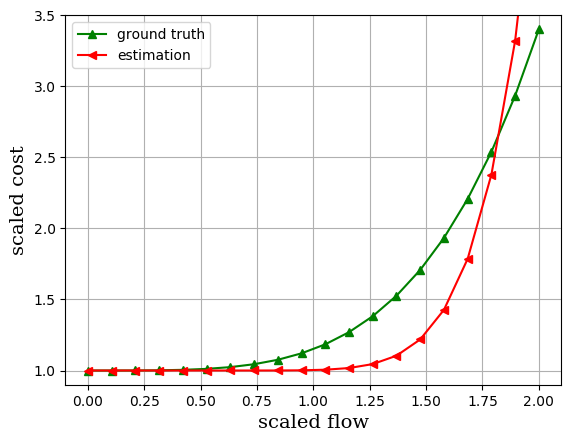

In [17]:
using PyPlot

iterN = 1

true_coeffs = [1, 0, 0, 0, 0.15]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict[(deg, c, lam, iterN)]

xs = linspace(0, 2, 20)
zs_true = map(x->polyEval(true_coeffs, x), xs)

zs = map(x->polyEval(est_coeffs, x), xs)

PyPlot.plot(xs, zs_true, "^-g", label="ground truth")
PyPlot.plot(xs, zs, "<-r", label="estimation")

legend(loc="upper left",fancybox="true") 
# PyPlot.plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 2.1);
ylim(0.9, 3.5);

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)
xlabel("scaled flow", fontdict=font1)
ylabel("scaled cost", fontdict=font1)

savefig("./results/fitting_MA_journal_iter_$(iterN)_multi_class.pdf")

In [18]:
demandsVecDictCar[1] = demandsDicToVec(demandsDictCar[1]);
demandsVecDictTruck[1] = demandsDicToVec(demandsDictTruck[1]);

objFunDict[1] = objF(demandsVecDictCar[1], demandsVecDictTruck[1], coeffs_dict[(deg, c, lam, 1)]);

In [19]:
# get initial flow vector (corresponding to initial demands)
tapFlowDicDict[1], tapFlowVecDict[1] = tapMSA_Multi(demandsDictCar[1], demandsDictTruck[1], 
coeffs_dict[(deg, c, lam, 1)]);

In [20]:
tapFlowDicDict[1]

Dict{Any,Any} with 2 entries:
  "car"   => Dict{Any,Any}(Pair{Any,Any}((53,54),267.364),Pair{Any,Any}((32,60)…
  "truck" => Dict{Any,Any}(Pair{Any,Any}((53,54),66.8411),Pair{Any,Any}((32,60)…

In [21]:
tapFlowVecDict[1] 

2×258 Array{Float64,2}:
 464.792  209.757   948.867  614.859  0.0  0.0  …  0.0  0.0  499.649  449.832
 116.196   52.4392  237.219  153.715  0.0  0.0     0.0  0.0  124.912  112.458

In [22]:
# get arcs data corresponding to initial demands and flows
arcsDict[1] = observFlow("./benchmark_data/MA_journal_net.txt", tapFlowDicDict[1]);

In [23]:
linkCostDicDict[1] = tapFlowVecToLinkCostDict(tapFlowVecDict[1], coeffs_dict[(deg, c, lam, 1)]);

In [24]:
linkCostDicDict[1]["car"]

Dict{Any,Any} with 258 entries:
  "1"   => 0.240297
  "54"  => 0.0212531
  "101" => 0.0727238
  "41"  => 0.149761
  "65"  => 0.0796391
  "168" => 0.0658098
  "159" => 0.0494838
  "228" => 0.649402
  "190" => 0.575118
  "227" => 0.081947
  "223" => 0.135529
  "88"  => 0.0366904
  "26"  => 0.105566
  "250" => 0.039206
  "77"  => 0.0661741
  "230" => 0.160812
  "24"  => 0.364887
  "204" => 0.288631
  "23"  => 0.27941
  "160" => 0.624606
  "149" => 0.172289
  "59"  => 0.0486815
  "184" => 0.274471
  "43"  => 0.169508
  "122" => 0.176349
  ⋮     => ⋮

In [25]:
linkCostDicDict[1]["truck"]

Dict{Any,Any} with 258 entries:
  "1"   => 0.264327
  "54"  => 0.0233785
  "101" => 0.0799962
  "41"  => 0.164737
  "65"  => 0.087603
  "168" => 0.0723908
  "159" => 0.0544322
  "228" => 0.714342
  "190" => 0.63263
  "227" => 0.0901417
  "223" => 0.149082
  "88"  => 0.0403594
  "26"  => 0.116123
  "250" => 0.0431266
  "77"  => 0.0727915
  "230" => 0.176893
  "24"  => 0.401376
  "204" => 0.317494
  "23"  => 0.30735
  "160" => 0.687067
  "149" => 0.189518
  "59"  => 0.0535496
  "184" => 0.301918
  "43"  => 0.186459
  "122" => 0.193984
  ⋮     => ⋮

In [26]:
link_length_list

258-element Array{Any,1}:
 0.238965
 0.240297
 0.222813
 0.218902
 0.402046
 0.403219
 0.106992
 0.108032
 0.109499
 0.107665
 0.349058
 0.346955
 0.153312
 ⋮       
 0.082705
 0.08412 
 0.088355
 0.096311
 0.039206
 0.041562
 0.279353
 0.281204
 0.077249
 0.082871
 0.23159 
 0.236104

In [27]:
link_length_list_car = [linkCostDicDict[1]["car"]["$(i)"] for i=0:numLinks-1]
link_length_list_truck = [linkCostDicDict[1]["truck"]["$(i)"] for i=0:numLinks-1]

link_length_list_dict[0] = link_length_list_car
link_length_list_dict[1] = link_length_list_truck

link_length_list_dict_dict[1] = link_length_list_dict

Dict{Any,Any} with 2 entries:
  0 => [0.238967,0.240297,0.222815,0.218903,0.402046,0.403219,0.164551,0.160019…
  1 => [0.262863,0.264327,0.245097,0.240794,0.442251,0.443541,0.181006,0.176021…

In [28]:
jacobiSpiessDict[1] = Compute_Jacobian_MA_journal_multi_class.jacobianSpiess(numNodes, numLinks, numODpairs, od_pairs, 
link_list_js, link_length_list_dict_dict[1]);

In [29]:
jacobiSpiessDict[1]

5402×258×2 Array{Float64,3}:
[:, :, 1] =
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.

In [30]:
# maximum number of iterations
N = 50;  

# Armijo rule parameters
rho = 2;
M = 10;

# search direction parameter
epsilon_1 = 0;

# stop criterion parameter
epsilon_2 = 1e-20;

In [31]:
for iterNumber = 1:N
    
    l = iterNumber;
    
    jacobDict[l] = jacobiSpiessDict[l]

    descDirecDict[l] = descDirec(tapFlowVecDict[l], tapFlowVecDict[0], jacobDict[l], numODpairs, numLinks);
    
    demandsVecDictCar[l] = demandsDicToVec(demandsDictCar[l]);
    demandsVecDictTruck[l] = demandsDicToVec(demandsDictTruck[l]);

    searchDirecDict[l] = searchDirec(demandsVecDictCar[l], demandsVecDictTruck[l], descDirecDict[l], epsilon_1);
    
    thetaMaxDict[l] = thetaMax(demandsVecDictCar[l], demandsVecDictTruck[l], searchDirecDict[l]);
    
    demandsVecDictCar[l+1] = similar(demandsVecDictCar[0]);
    demandsVecDictTruck[l+1] = similar(demandsVecDictTruck[0]);
    
    demandsVecDictCar[l+1], demandsVecDictTruck[l+1], objFunDict[l+1] = armijo(objFunDict[l], demandsVecDictCar[l], 
    demandsVecDictTruck[l], coeffs_dict[(deg, c, lam, l)], searchDirecDict[l], thetaMaxDict[l], rho, M);
        
    demandsDictCar[l+1] = demandsVecToDic(demandsVecDictCar[l+1]);
    demandsDictTruck[l+1] = demandsVecToDic(demandsVecDictTruck[l+1]);
    
    tapFlowDicDict[l+1], tapFlowVecDict[l+1] = tapMSA_Multi(demandsDictCar[l+1], demandsDictTruck[l+1], 
    coeffs_dict[(deg, c, lam, l)]);
        
    arcsDict[l+1] = observFlow("./benchmark_data/MA_journal_net.txt", tapFlowDicDict[l+1]);
        
    coeffs_dict[(deg, c, lam, l+1)], objInvVIDict[l+1] = train(lam, deg, c, demandsDictCar[l+1], 
    demandsDictTruck[l+1], arcsDict[0]);
    
    linkCostDicDict[l+1] = tapFlowVecToLinkCostDict(tapFlowVecDict[l+1], coeffs_dict[(deg, c, lam, l+1)]);
        
    #######################################
    link_length_list_dict[0] = [linkCostDicDict[l+1]["car"]["$(i)"] for i=0:numLinks-1]
    link_length_list_dict[1] = [linkCostDicDict[l+1]["truck"]["$(i)"] for i=0:numLinks-1]
    link_length_list_dict_dict[l+1] = link_length_list_dict
    #######################################
    
    jacobiSpiessDict[l+1] = Compute_Jacobian_MA_journal_multi_class.jacobianSpiess(numNodes, numLinks, numODpairs, 
    od_pairs, link_list_js, link_length_list_dict_dict[l+1]);
        
    demandsDiffDictCar[l+1] = norm(demandsVecDictCar[l+1] - demandsVecDictCar[0]) / norm(demandsVecDictCar[0]);
    demandsDiffDictTruck[l+1] = norm(demandsVecDictTruck[l+1] - demandsVecDictTruck[0]) / 
    norm(demandsVecDictTruck[0]);
    
    # stopping criterion
    if (objFunDict[l] - objFunDict[l+1]) / objFunDict[1] < epsilon_2
        break
    end
        
end

# normalize objective function value
for l = 1:(length(objFunDict))
    norObjFunDict[l] = objFunDict[l] / objFunDict[1];
end

In [32]:
demandsVecDictCar

Dict{Any,Any} with 5 entries:
  0 => [51.0423,377.456,0.0,0.0,0.0,734.791,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0…
  4 => [50.9678,377.45,0.0,0.164048,0.00728532,734.763,0.0,0.0,0.113811,0.0  … …
  2 => [50.9678,377.45,0.0,0.164048,0.0072853,734.763,0.0,0.0,0.11381,0.0  …  0…
  3 => [50.9678,377.45,0.0,0.164048,0.00728532,734.763,0.0,0.0,0.113811,0.0  … …
  1 => [51.0423,377.456,0.0,0.0,0.0,734.791,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0…

In [33]:
demandsVecDictTruck

Dict{Any,Any} with 5 entries:
  0 => [12.7606,94.3639,0.0,0.0,0.0,183.698,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0…
  4 => [12.742,94.3626,0.0,0.0410146,0.00182176,183.691,0.0,0.0,0.0284552,0.0  …
  2 => [12.742,94.3626,0.0,0.0410145,0.00182176,183.691,0.0,0.0,0.0284551,0.0  …
  3 => [12.742,94.3626,0.0,0.0410146,0.00182176,183.691,0.0,0.0,0.0284552,0.0  …
  1 => [12.7606,94.3639,0.0,0.0,0.0,183.698,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0…

In [34]:
norObjFunDict

Dict{Any,Any} with 4 entries:
  4 => 0.948879
  2 => 0.949171
  3 => 0.948879
  1 => 1.0

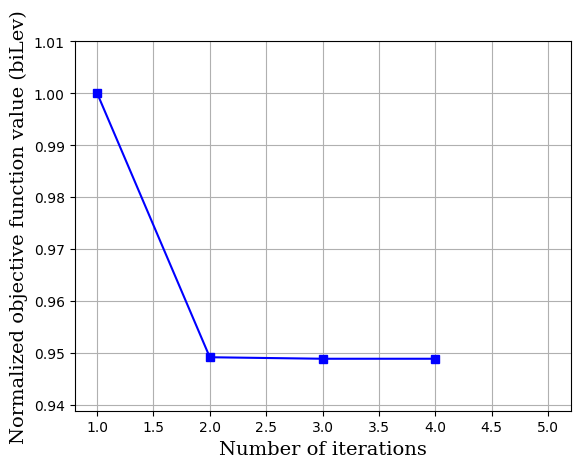

In [35]:
using PyPlot

iterNum = 1:(length(norObjFunDict))

objFun = map(iterNum->norObjFunDict[iterNum], iterNum)

# PyPlot.plot(iterNum, objFun, "s-g", label="True")

PyPlot.plot(iterNum, objFun, "s-b")

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(.8, length(norObjFunDict) + 1 + .2)
ylim(minimum(objFun)-.01, maximum(objFun)+.01)

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)

xlabel("Number of iterations", fontdict=font1)
ylabel("Normalized objective function value (biLev)", fontdict=font1)

savefig("./results/objFun_biLev_MA_journal.pdf")

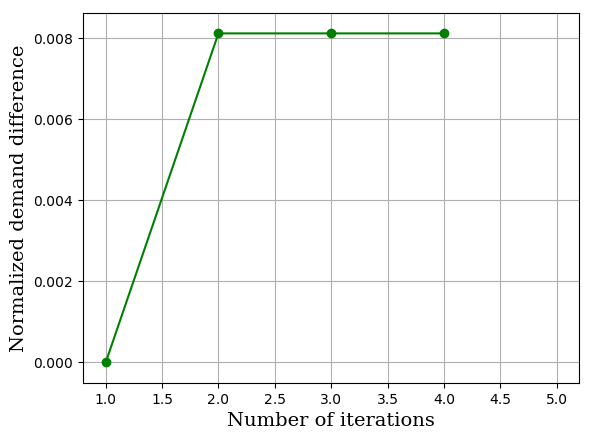

In [36]:
using PyPlot

iterNum = 1:(length(demandsDiffDictCar))

demandsDiff = map(iterNum->demandsDiffDictCar[iterNum], iterNum)

# PyPlot.plot(iterNum, objFun, "s-g", label="True")

PyPlot.plot(iterNum, demandsDiff, "o-g")

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(.8, length(demandsDiffDictCar) + 1 + .2)
ylim(minimum(demandsDiff)-.0005, maximum(demandsDiff)+.0005)

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)

xlabel("Number of iterations", fontdict=font1)
ylabel("Normalized demand difference", fontdict=font1)

savefig("./results/demandsDiff_biLev_MA_journal_car.pdf")

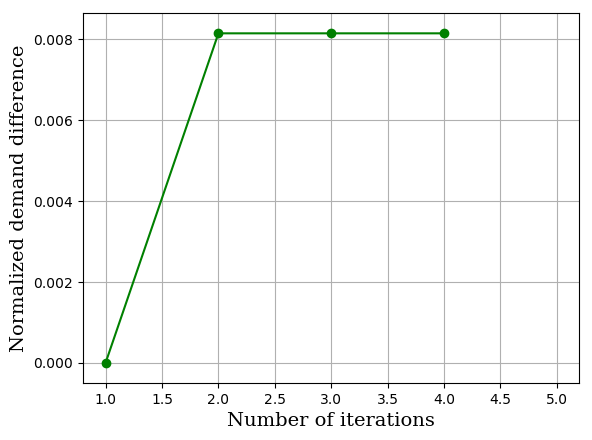

In [37]:
using PyPlot

iterNum = 1:(length(demandsDiffDictTruck))

demandsDiff = map(iterNum->demandsDiffDictTruck[iterNum], iterNum)

# PyPlot.plot(iterNum, objFun, "s-g", label="True")

PyPlot.plot(iterNum, demandsDiff, "o-g")

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(.8, length(demandsDiffDictTruck) + 1 + .2)
ylim(minimum(demandsDiff)-.0005, maximum(demandsDiff)+.0005)

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)

xlabel("Number of iterations", fontdict=font1)
ylabel("Normalized demand difference", fontdict=font1)

savefig("./results/demandsDiff_biLev_MA_journal_truck.pdf")

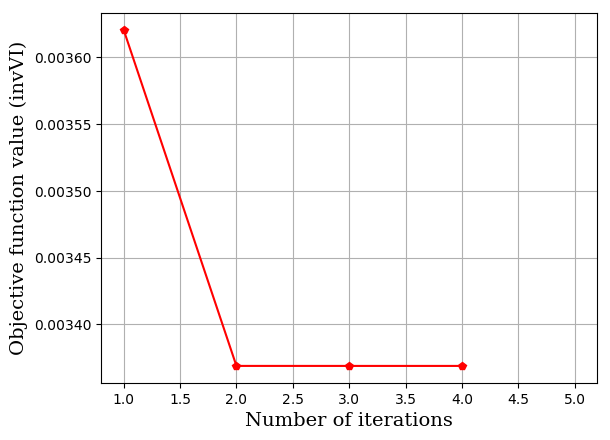

In [38]:
using PyPlot

iterNum = 1:(length(objInvVIDict))

objFun = map(iterNum->objInvVIDict[iterNum], iterNum)

# PyPlot.plot(iterNum, objFun, "s-g", label="True")

PyPlot.plot(iterNum, objFun, "p-r")

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(0.8, length(objInvVIDict) + 1 + .2)
# ylim(0.9, 2.0)

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)

xlabel("Number of iterations", fontdict=font1)
ylabel("Objective function value (invVI)", fontdict=font1)

savefig("./results/objFun_invVI_MA_journal.pdf")

In [39]:
coeffs_dict

Dict{Any,Any} with 4 entries:
  (8,1.5,0.001,4) => [1.0,-1.51134e-6,0.000711094,-0.000352854,-0.0215583,0.081…
  (8,1.5,0.001,1) => [1.0,-1.12316e-6,0.000525519,0.00101216,-0.0256648,0.08720…
  (8,1.5,0.001,2) => [1.0,-1.51515e-6,0.000712998,-0.000365955,-0.0215211,0.081…
  (8,1.5,0.001,3) => [1.0,-1.51134e-6,0.000711094,-0.000352854,-0.0215583,0.081…

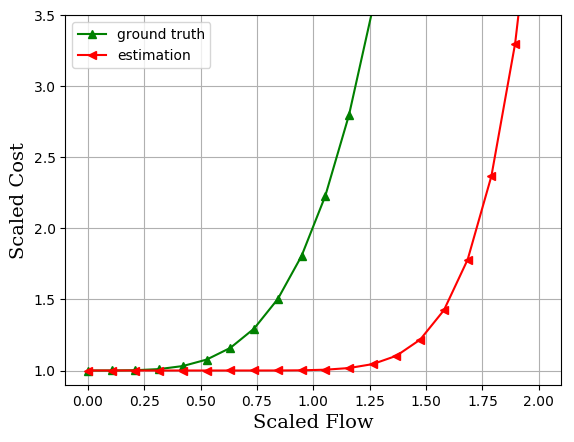

In [40]:
using PyPlot

iterN = 2

true_coeffs = [1, 0, 0, 0, 1]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict[(deg, c, lam, iterN)]

xs = linspace(0, 2, 20)
zs_true = map(x->polyEval(true_coeffs, x), xs)

zs = map(x->polyEval(est_coeffs, x), xs)

PyPlot.plot(xs, zs_true, "^-g", label="ground truth")
PyPlot.plot(xs, zs, "<-r", label="estimation")

legend(loc="upper left",fancybox="true") 
# PyPlot.plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 2.1);
ylim(0.9, 3.5);

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results/fitting_MA_journal_iter_$(iterN)_multi_class.pdf")

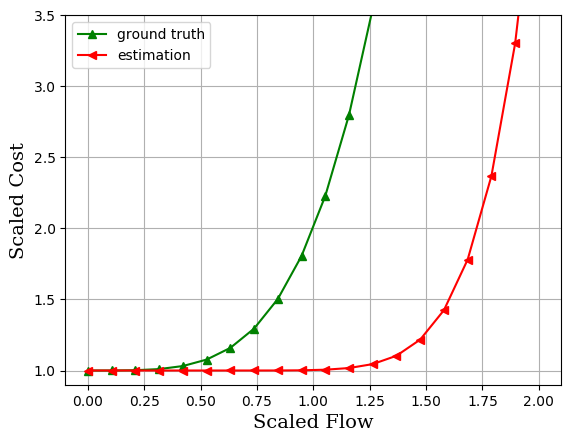

In [41]:
using PyPlot

iterN = 3

true_coeffs = [1, 0, 0, 0, 1]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict[(deg, c, lam, iterN)]

xs = linspace(0, 2, 20)
zs_true = map(x->polyEval(true_coeffs, x), xs)

zs = map(x->polyEval(est_coeffs, x), xs)

PyPlot.plot(xs, zs_true, "^-g", label="ground truth")
PyPlot.plot(xs, zs, "<-r", label="estimation")

legend(loc="upper left",fancybox="true") 
# PyPlot.plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 2.1);
ylim(0.9, 3.5);

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results/fitting_MA_journal_iter_$(iterN)_multi_class.pdf")

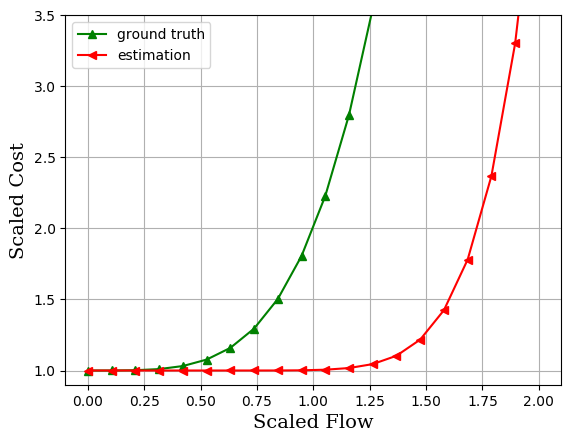

In [42]:
using PyPlot

iterN = length(coeffs_dict)

true_coeffs = [1, 0, 0, 0, 1]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict[(deg, c, lam, iterN)]

xs = linspace(0, 2, 20)
zs_true = map(x->polyEval(true_coeffs, x), xs)

zs = map(x->polyEval(est_coeffs, x), xs)

PyPlot.plot(xs, zs_true, "^-g", label="ground truth")
PyPlot.plot(xs, zs, "<-r", label="estimation")

legend(loc="upper left",fancybox="true") 
# PyPlot.plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 2.1);
ylim(0.9, 3.5);

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results/fitting_MA_journal_iter_$(iterN)_multi_class.pdf")

In [43]:
outfile = open("./results/norObjFunDict.json", "w")

JSON.print(outfile, norObjFunDict)

close(outfile)

In [44]:
outfile = open("./results/demandsDiffDictCar.json", "w")

JSON.print(outfile, demandsDiffDictCar)

close(outfile)

In [45]:
outfile = open("./results/demandsDiffDictTruck.json", "w")

JSON.print(outfile, demandsDiffDictTruck)

close(outfile)

In [46]:
outfile = open("./results/objInvVIDict.json", "w")

JSON.print(outfile, objInvVIDict)

close(outfile)

In [47]:
outfile = open("./results/coeffs_dict.json", "w")

JSON.print(outfile, coeffs_dict)

close(outfile)

In [48]:
outfile = open("./results/demandsVecDictCar.json", "w")

JSON.print(outfile, demandsVecDictCar)

close(outfile)

In [49]:
outfile = open("./results/demandsVecDictTruck.json", "w")

JSON.print(outfile, demandsVecDictTruck)

close(outfile)

In [50]:
outfile = open("./results/demandsDictCar.json", "w")

JSON.print(outfile, demandsDictCar)

close(outfile)

In [51]:
outfile = open("./results/demandsDictTruck.json", "w")

JSON.print(outfile, demandsDictTruck)

close(outfile)

In [52]:
outfile = open("./results/tapFlowDicDict.json", "w")

JSON.print(outfile, tapFlowDicDict)

close(outfile)

In [53]:
outfile = open("./results/tapFlowVecDict.json", "w")

JSON.print(outfile, tapFlowVecDict)

close(outfile)